In [1]:
from pydub import AudioSegment, effects
import IPython.display as ipd
import shutil
from pydiogment.auga import normalize
import librosa, librosa.display
import numpy as np
from glob import glob
from tqdm import tqdm
import seaborn as sns
from pydub.utils import make_chunks

In [2]:
wav_file = AudioSegment.from_file(file = '../data/sample_data/vakyansh_sample/20200523134303119Z_a5hh8an9.wav',
                                  format="wav")
wav_file

In [35]:
wav_file.apply_gain(20)
wav_file

In [13]:
def get_loudness_info(audio_path):
    audios = glob(audio_path + '/*.wav')
    loudness = []
    for audio in tqdm(audios):
        wav_file = AudioSegment.from_file(file=audio, format='wav')
        loudness.append(wav_file.dBFS)
    return loudness

100%|██████████| 136/136 [00:00<00:00, 4707.26it/s]


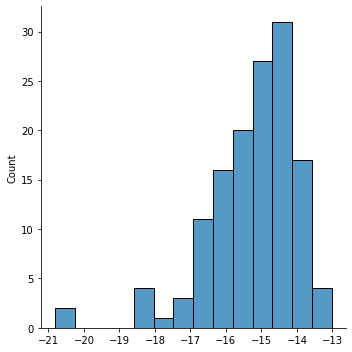

In [25]:
db_levels = get_loudness_info('../data/sample_data/vakyansh_sample')
sns.displot(db_levels)

100%|██████████| 136/136 [00:00<00:00, 4972.46it/s]


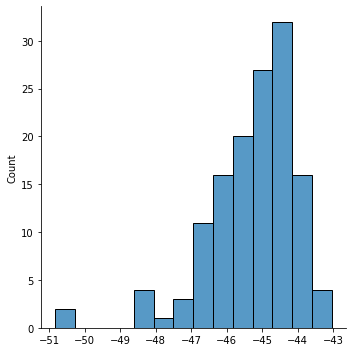

In [21]:
db_levels = get_loudness_info('../data/sample_data/vakyansh_sample_vol_down_30/')
sns.displot(db_levels)

100%|██████████| 136/136 [00:00<00:00, 5024.09it/s]


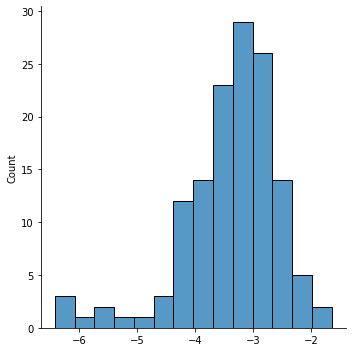

In [23]:
db_levels = get_loudness_info('../data/sample_data/vakyansh_sample_vol_up_30/')
sns.displot(db_levels)

In [27]:
louder_wav_file = wav_file + 30
louder_wav_file

In [38]:
target_dBFS = -15
loudness_difference = target_dBFS - louder_wav_file.dBFS
loudness_difference
test_sound = louder_wav_file + loudness_difference
test_sound

In [57]:
normalized_sound = effects.normalize(louder_wav_file)
normalized_sound

In [30]:
fainter_wav_file = wav_file - 30
fainter_wav_file

In [39]:
target_dBFS = -15
loudness_difference = target_dBFS - fainter_wav_file.dBFS
test_sound = fainter_wav_file + loudness_difference
test_sound

In [40]:
normalized_sound = effects.normalize(fainter_wav_file)
normalized_sound

In [49]:
louder_wav_file.export(out_f = "../data/louder_wav_file.wav",  
                       format = "wav") 

<_io.BufferedRandom name='../data/louder_wav_file.wav'>

In [2]:
def normalize(infile, rms_level=0):
    r = 10**(rms_level / 10.0)
    a = np.sqrt( (len(infile) * r**2) / np.sum(infile**2) )

    # normalize
    y = infile * a
    return y

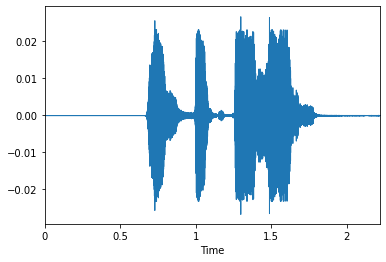

In [3]:
signal, sr = librosa.load('../data/sample_data/vakyansh_sample_vol_down_30/20200523134303119Z_a5hh8an9.wav', sr=16000)
librosa.display.waveplot(signal, sr=sr)
ipd.Audio(signal, rate=sr)

In [83]:
ipd.Audio(normalize(signal), rate=sr)